In [1]:
train_file_path = r"C:\Users\ASUS\Desktop\Python\git_project\ml_project\housing\artifact\data_ingestion\2023-02-06-14-06-10\ingested_data\train\housing.csv"

In [2]:
import os

In [3]:
os.getcwd()

'c:\\Users\\ASUS\\Desktop\\Python\\git_project\\ml_project\\note1'

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv(train_file_path)

In [6]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


In [7]:
df.shape

(16512, 10)

In [8]:
df["median_house_value"]

0         72100.0
1        279600.0
2         82700.0
3        112500.0
4        238300.0
           ...   
16507    268500.0
16508     90400.0
16509    140400.0
16510    258100.0
16511     62700.0
Name: median_house_value, Length: 16512, dtype: float64

In [9]:
x,y = df.drop(columns=["median_house_value"],axis=1),df[['median_house_value']]

In [10]:
from sklearn.impute import SimpleImputer

In [11]:
x.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [12]:
numerical_cols = x.drop(columns=["ocean_proximity"],axis = 1)

In [13]:
numerical_cols

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [14]:
simple_imputer = SimpleImputer(strategy="median")

In [15]:
simple_imputer.fit_transform(numerical_cols)

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [16]:
df = simple_imputer.transform(numerical_cols)

In [17]:
df

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [18]:
simple_imputer = SimpleImputer(strategy='most_frequent')

In [19]:
simple_imputer.statistics_
simple_imputer.feature_names_in_

AttributeError: 'SimpleImputer' object has no attribute 'statistics_'

In [ ]:
x.ocean_proximity.value_counts()

<1H OCEAN     7277
INLAND        5262
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64

In [20]:
class FeatureGenerator():
    def __init__(self,strategy="median"):
        self.strategy = strategy

    def fit(self,X):
        self.features = X.columns
        self.statistic_ =  []
        for column in X.columns:
            self.statistic_.append(X[column].median())

    def transform(self,X:pd.DataFrame):
        for idx,column in enumerate(X.columns):
            X[column].fillna(self.statistic_[idx])
        return X
    
    def fit_transform(self,X):
        self.fit(X)
        return self.transform(X)


In [21]:
class FeatureGenerator(BaseEstimator, TransformerMixin):

    def __init__(self, add_bedrooms_per_room=True,
                 total_rooms_ix=3,
                 population_ix=5,
                 households_ix=6,
                 total_bedrooms_ix=4, columns=None):
        """
        FeatureGenerator Initialization
        add_bedrooms_per_room: bool
        total_rooms_ix: int index number of total rooms columns
        population_ix: int index number of total population columns
        households_ix: int index number of  households columns
        total_bedrooms_ix: int index number of bedrooms columns
        """
        try:
            self.columns = columns
            if self.columns is not None:
                total_rooms_ix = self.columns.index(COLUMN_TOTAL_ROOMS)
                population_ix = self.columns.index(COLUMN_POPULATION)
                households_ix = self.columns.index(COLUMN_HOUSEHOLDS)
                total_bedrooms_ix = self.columns.index(COLUMN_TOTAL_BEDROOM)

            self.add_bedrooms_per_room = add_bedrooms_per_room
            self.total_rooms_ix = total_rooms_ix
            self.population_ix = population_ix
            self.households_ix = households_ix
            self.total_bedrooms_ix = total_bedrooms_ix
        except Exception as e:
            raise HousingException(e, sys) from e

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        try:
            room_per_household = X[:, self.total_rooms_ix] / \
                                 X[:, self.households_ix]
            population_per_household = X[:, self.population_ix] / \
                                       X[:, self.households_ix]
            if self.add_bedrooms_per_room:
                bedrooms_per_room = X[:, self.total_bedrooms_ix] / \
                                    X[:, self.total_rooms_ix]
                generated_feature = np.c_[
                    X, room_per_household, population_per_household, bedrooms_per_room]
            else:
                generated_feature = np.c_[
                    X, room_per_household, population_per_household]

            return generated_feature
        except Exception as e:
            raise HousingException(e, sys) from e

NameError: name 'BaseEstimator' is not defined

In [22]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN


In [23]:
from sklearn.base import BaseEstimator,TransformerMixin
from housing.exception import HousingException
import sys,os

In [24]:
class FeatureGenerator(BaseEstimator, TransformerMixin):

    def __init__(self, add_bedrooms_per_room=True,
                 total_rooms_ix=3,
                 population_ix=5,
                 households_ix=6,
                 total_bedrooms_ix=4, columns=None):
        """
        FeatureGenerator Initialization
        add_bedrooms_per_room: bool
        total_rooms_ix: int index number of total rooms columns
        population_ix: int index number of total population columns
        households_ix: int index number of  households columns
        total_bedrooms_ix: int index number of bedrooms columns
        """
        try:
            self.columns = columns
            if self.columns is not None:
                total_rooms_ix = self.columns.index(COLUMN_TOTAL_ROOMS)
                population_ix = self.columns.index(COLUMN_POPULATION)
                households_ix = self.columns.index(COLUMN_HOUSEHOLDS)
                total_bedrooms_ix = self.columns.index(COLUMN_TOTAL_BEDROOM)

            self.add_bedrooms_per_room = add_bedrooms_per_room
            self.total_rooms_ix = total_rooms_ix
            self.population_ix = population_ix
            self.households_ix = households_ix
            self.total_bedrooms_ix = total_bedrooms_ix
        except Exception as e:
            raise HousingException(e, sys) from e

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        try:
            room_per_household = X[:, self.total_rooms_ix] / \
                                 X[:, self.households_ix]
            population_per_household = X[:, self.population_ix] / \
                                       X[:, self.households_ix]
            if self.add_bedrooms_per_room:
                bedrooms_per_room = X[:, self.total_bedrooms_ix] / \
                                    X[:, self.total_rooms_ix]
                generated_feature = np.c_[
                    X, room_per_household, population_per_household, bedrooms_per_room]
            else:
                generated_feature = np.c_[
                    X, room_per_household, population_per_household]

            return generated_feature
        except Exception as e:
            raise HousingException(e, sys) from e

In [27]:
import numpy as np

In [28]:
arr1 = np.arange(0,10)
arr2 = np.arange(10,20)

In [29]:
arr3 = np.c_[arr2,arr1]

In [30]:
arr3

array([[10,  0],
       [11,  1],
       [12,  2],
       [13,  3],
       [14,  4],
       [15,  5],
       [16,  6],
       [17,  7],
       [18,  8],
       [19,  9]])

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [91]:
from sklearn.preprocessing import StandardScaler

In [90]:
num_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('feature_generator',FeatureGenerator()),
    ('scaling',StandardScaler())
])

In [79]:
from sklearn.preprocessing import OneHotEncoder

In [89]:
cat_pipeline = Pipeline(steps=[
('imputer',SimpleImputer(strategy="most_frequent")),
('OnehotEncoder',OneHotEncoder()),
('scaling',StandardScaler(with_mean=False)),
])

In [81]:
df = pd.read_csv(train_file_path)

In [92]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [93]:
num_col_names = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']

In [94]:
num_col_names[0]

'longitude'

In [95]:
cat_col_name = ['ocean_proximity']

In [96]:
cat_col_name

['ocean_proximity']

In [97]:
preprocessing = ColumnTransformer([
('num_pipeline',num_pipeline,num_col_names),
('cat_pipeline',cat_pipeline,cat_col_name)]
)

In [121]:
train_df = preprocessing.fit_transform(df)

In [101]:
testing_file_path = r"C:\Users\ASUS\Desktop\Python\git_project\ml_project\housing\artifact\data_ingestion\2023-02-06-14-06-10\ingested_data\test\housing.csv"

In [102]:
test_df = pd.read_csv(testing_file_path)

In [104]:
test_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
1,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN
2,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN
3,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN
4,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN


In [105]:
preprocessing.transform(test_df)

array([[ 0.59229422, -0.71065803,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [-0.42180959, -0.35049119, -0.37006852, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.56232071, -0.64985064,  0.5842485 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.07211862, -0.56097831,  1.14093342, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.83208232, -0.93985512,  0.10708999, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.50736927, -0.67791559,  0.5842485 , ...,  0.        ,
         0.        ,  0.        ]])

In [106]:
import dill

In [113]:
with open('preprocessing.pkl','wb') as prep_file:
    dill.dump(preprocessing,prep_file)

In [114]:
with open('preprocessing.pkl','rb') as file_obj:
    preprocessing_loaded_obj = dill.load(file_obj)

In [116]:
preprocessing_loaded_obj.transform(test_df)

array([[ 0.59229422, -0.71065803,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [-0.42180959, -0.35049119, -0.37006852, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.56232071, -0.64985064,  0.5842485 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.07211862, -0.56097831,  1.14093342, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.83208232, -0.93985512,  0.10708999, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.50736927, -0.67791559,  0.5842485 , ...,  0.        ,
         0.        ,  0.        ]])

In [117]:
from sklearn.linear_model import LinearRegression

In [118]:
regressor = LinearRegression()

In [122]:
x = train_df

In [123]:
y = np.array(df.median_house_value)

In [124]:
regressor.fit(x,y)

LinearRegression()

In [126]:
regressor.fit_intercept

True

In [127]:
y_hat = regressor.predict(x)

In [128]:
import matplotlib.pyplot as plt

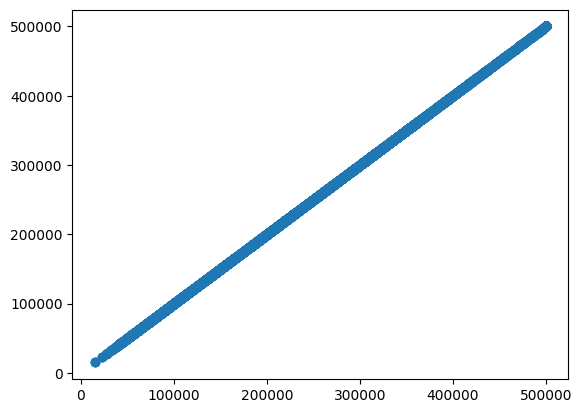

In [130]:
plt.plot(y,y_hat,'o')

In [131]:
from sklearn.metrics import r2_score

In [132]:
r2_score(y,y_hat)

1.0

In [1]:

schema_file_path = r"C:\Users\ASUS\Desktop\Python\git_project\ml_project\config\schema.yaml"
file_path = r"C:\Users\ASUS\Desktop\Python\git_project\ml_project\housing\artifact\data_ingestion\2023-02-06-14-06-10\ingested_data\train\housing.csv"


In [2]:
from housing.component.data_transformation import DataTransformation
df = DataTransformation.load_data(file_path=file_path,schema_file_path=schema_file_path)
print(df.columns)
print(df.dtypes)

HousingException: 
        Error occured in script: 
        [ c:\users\asus\desktop\python\git_project\ml_project\housing\component\data_transformation.py ] at 
        try block line number: [117]
        and exception block line number: [126] error message: ['NoneType' object has no attribute 'keys']

In [5]:

import pandas as pd
from housing.util.util import read_yaml_file
DATASET_SCHEMA_COLUMNS_KEY = "columns"
# def load_data(file_path:str,schema_file_path:str)-> pd.DataFrame:
#     try:
#         dataset_schema = read_yaml_file(schema_file_path)
#         schema = dataset_schema[DATASET_SCHEMA_COLUMNS_KEY]
#         dataframe = pd.read_csv(file_path)
#         print(schema)
#         error_message = ""

#         for column in dataframe.columns:
#             if column in list(schema.keys()):
#                 dataframe[column].astype(schema[column])
#             else:
#                 error_message = f"{error_message} \nColumn: [{column}] is not in the schema"
#             if len(error_message)>0:
#                 raise Exception (error_message)
#             return dataframe
#     except Exception as e:
#         print(e)

In [6]:
dataset_schema = read_yaml_file(schema_file_path)
schema = dataset_schema[DATASET_SCHEMA_COLUMNS_KEY]
dataframe = pd.read_csv(file_path)
print(schema)

None


In [14]:
dataset_schema

{'columns': None,
 'longitude': 'float',
 'latitude': 'float',
 'housing_median_age': 'float',
 'total_rooms': 'float',
 'total_bedrooms': 'float',
 'population': 'float',
 'households': 'float',
 'median_income': 'float',
 'median_house_value': 'float',
 'ocean_proximity': 'category',
 'income_cat': 'float',
 'target_column': 'median_house_value',
 'domain_value': {'ocean_proximity': ['<1 OCEAN',
   'INLAND',
   'ISLAND',
   'NEAR BAY',
   'NEAR OCEAN']}}

In [1]:
import pandas as pd


In [18]:
from housing.util.util import load_data,read_yaml_file
from housing.entity.artifact_entity import DataIngestionArtifact
from housing.constant import *


In [7]:
train_file_path = r'C:\Users\ASUS\Desktop\Python\git_project\ml_project\housing\artifact\data_ingestion\2023-02-15-15-48-58\ingested_data\train\housing.csv'
schema_file_path = r'C:\Users\ASUS\Desktop\Python\git_project\ml_project\config\schema.yaml'


In [13]:
train_dfs = load_data(file_path=train_file_path,schema_file_path=schema_file_path)

In [27]:
schema = read_yaml_file(file_path=schema_file_path)         
            
target_column_name = schema[TARGET_COLUMN_KEY]
input_feature_train_df  = train_df.drop(columns=[target_column_name],axis=1)


In [30]:
target_feature_train_df = train_df[target_column_name]
target_feature_train_df


0         72100.0
1        279600.0
2         82700.0
3        112500.0
4        238300.0
           ...   
16507    268500.0
16508     90400.0
16509    140400.0
16510    258100.0
16511     62700.0
Name: median_house_value, Length: 16512, dtype: float64

In [31]:
train_df['median_house_value']

0         72100.0
1        279600.0
2         82700.0
3        112500.0
4        238300.0
           ...   
16507    268500.0
16508     90400.0
16509    140400.0
16510    258100.0
16511     62700.0
Name: median_house_value, Length: 16512, dtype: float64